In [475]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
from torch.autograd import Variable
import torch.optim as optim
from torch import sqrt
from matplotlib.animation import FuncAnimation
from IPython import display
import cv2 as cv2
from skimage.io import imread
import os


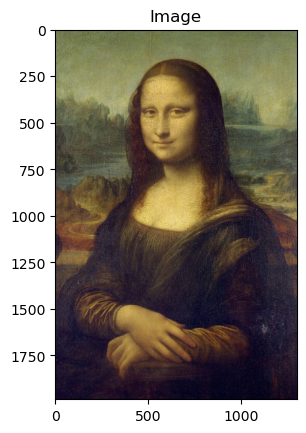

In [476]:
im = cv2.imread("/Users/georgebrown/Desktop/monalisa.jpeg")
color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

In [477]:
# Define the image path
image_path = '/Users/georgebrown/Desktop/monalisa.png'

# Check if the file exists at the specified path
if not os.path.exists(image_path):
    print(f"Error: The file at path {image_path} does not exist.")
else:
    # Read the image from the specified path
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is None:
        print("Error: Image not found or unable to read.")
    else:
        # Get the dimensions of the image
        height, width, channels = img.shape

        # Calculate the total number of pixels
        total_pixels = height * width

        # Print the total number of pixels
        print(f"The image has {total_pixels} pixels.")
        print(f"The images hight if {height} pixels.")
        print(f"The images widrth if {width} pixels.")



The image has 2514996 pixels.
The images hight if 1971 pixels.
The images widrth if 1276 pixels.


In [478]:
# Define the image path
image_path = '/Users/georgebrown/Desktop/monalisa.png'

# Check if the file exists at the specified path
if not os.path.exists(image_path):
    print(f"Error: The file at path {image_path} does not exist.")
else:
    # Read the image from the specified path
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is None:
        print("Error: Image not found or unable to read.")
    else:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Normalize the intensity values to the range [0, 1]
        unnormalized_intensity = gray_img/255

        # Print the normalized intensity values for the first 5x5 pixels as an example
       
        print(unnormalized_intensity[:3507, :2480])

[[0.4627451  0.45098039 0.43921569 ... 0.43137255 0.40784314 0.41176471]
 [0.47058824 0.4627451  0.45490196 ... 0.43529412 0.41176471 0.41176471]
 [0.48627451 0.47843137 0.49019608 ... 0.45098039 0.41960784 0.41960784]
 ...
 [0.07058824 0.0627451  0.06666667 ... 0.02745098 0.05490196 0.08235294]
 [0.08235294 0.07058824 0.06666667 ... 0.02745098 0.04313725 0.04313725]
 [0.0627451  0.0745098  0.07058824 ... 0.04705882 0.04705882 0.05490196]]


In [479]:
unnormalized_intensity_t = torch.tensor(unnormalized_intensity, dtype=torch.float32).type(torch.complex64)


In [480]:
sky_brightness = torch.fft.fftshift(torch.fft.ifft2(torch.fft.ifftshift(unnormalized_intensity_t)))

In [481]:
unnormalized_intensity_t.type

<function Tensor.type>

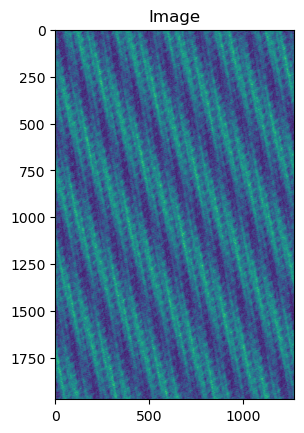

In [482]:
import torch

# Parameters
nant = 32
max_baseline = 4
width = 1276
height = 1971
center_position = [width / 2, height / 2]

# Generate random antenna positions
ant_array = []
for i in range(nant):
    xx = torch.rand(1).item() * max_baseline
    yy = torch.rand(1).item() * max_baseline
    ant_array.append([xx, yy])

ant_pos = torch.tensor(ant_array)
params = ant_pos.flatten()
ant_pos = params.reshape(nant, 2)

# Calculate baselines
baseline_array = []
for i in range(nant):
    for j in range(nant):
        if i != j:
            a1 = ant_pos[i]
            a2 = ant_pos[j]
            u = a1[0] - a2[0]
            v = a1[1] - a2[1]
            baseline_array.append([u, v])

baselines = torch.tensor(baseline_array)

# Initialize uv array


uv = torch.zeros((1971, 1276), dtype=torch.complex64, requires_grad=False)
#torch.zeros((height, width), dtype=torch.complex64, requires_grad=False)


# Iterate over baselines
for u, v in baselines:
    u_index = int((u + max_baseline) * width / (2 * max_baseline))
    v_index = int((v + max_baseline) * height / (2 * max_baseline))
    if 0 <= u_index < width and 0 <= v_index < height:
        uv[v_index, u_index] = sky_brightness[v_index, u_index]  # Fixed the indexing order here


# Compute the inverse FFT of the uv plane
sky_im = torch.fft.fftshift(torch.fft.ifft2(torch.fft.ifftshift(uv)))

# Check the result
sky=torch.abs(sky_im)

#vmin = 0.0
#vmax = 0.0007
#[v_index, u_index]

plt.imshow(sky)
plt.title('Image')
#plt.savefig('monalisa')
plt.show()


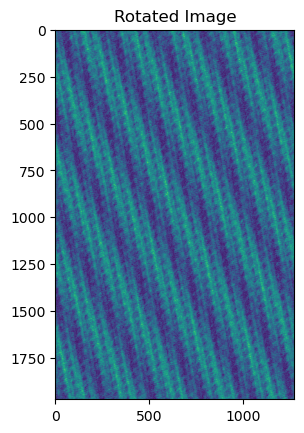

In [483]:
skys=torch.abs(sky_im)

sky_rotated = np.rot90(skys, 2)

# Display the rotated image
plt.imshow(sky_rotated)
plt.title('Rotated Image')
#plt.savefig('monalisa')  # Uncomment to save the image
plt.show()

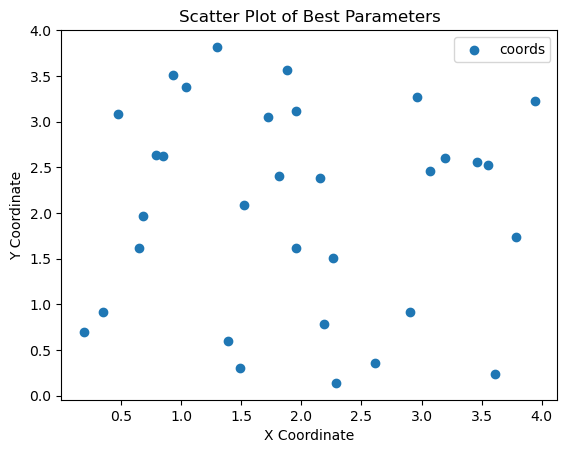

In [484]:
# Assuming best_params is a 1D tensor with shape (2 * nant,
# Extract x and y coordinates
x_coords = ant_pos[:, 0].numpy()
y_coords = ant_pos[:, 1].numpy()


# Create the scatter plot
plt.scatter(x_coords, y_coords, label='coords')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Best Parameters')
plt.legend()
plt.savefig('antenna coords')
plt.show()